# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | berber
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | veraval
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | callaway
Processing Record 11 of Set 1 | burang
Processing Record 12 of Set 1 | sambava
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | zhosaly
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | faya-largeau
Processing Record 20 of Set 1 | yishui
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | isafjordur
Processing Record 23 of Se

Processing Record 42 of Set 4 | sant'antioco
Processing Record 43 of Set 4 | concordia
Processing Record 44 of Set 4 | homer
Processing Record 45 of Set 4 | port-gentil
Processing Record 46 of Set 4 | berberati
Processing Record 47 of Set 4 | levuka
Processing Record 48 of Set 4 | la'ie
Processing Record 49 of Set 4 | la passe
Processing Record 0 of Set 5 | punta arenas
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | alotau
City not found. Skipping...
Processing Record 3 of Set 5 | ocean pointe
City not found. Skipping...
Processing Record 4 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 5 of Set 5 | kutum
Processing Record 6 of Set 5 | luganville
Processing Record 7 of Set 5 | toga village
City not found. Skipping...
Processing Record 8 of Set 5 | st. john's
Processing Record 9 of Set 5 | lake arrowhead
Processing Record 10 of Set 5 | soure
Processing Record 11 of Set 5 | mili
Processing Record 12 of Set 5 | belomorsk
Processing Record 13 of S

Processing Record 34 of Set 8 | taulaga
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | kataragama
City not found. Skipping...
Processing Record 37 of Set 8 | hacienda huancane
Processing Record 38 of Set 8 | horta
Processing Record 39 of Set 8 | el granada
Processing Record 40 of Set 8 | alesund
Processing Record 41 of Set 8 | grenada
Processing Record 42 of Set 8 | amble
Processing Record 43 of Set 8 | mil'kovo
Processing Record 44 of Set 8 | margate
Processing Record 45 of Set 8 | geroskipou
City not found. Skipping...
Processing Record 46 of Set 8 | tabas
Processing Record 47 of Set 8 | katabu
Processing Record 48 of Set 8 | novodvinsk
Processing Record 49 of Set 8 | yallahs
Processing Record 0 of Set 9 | tranovaho
City not found. Skipping...
Processing Record 1 of Set 9 | san antonio de pale
Processing Record 2 of Set 9 | harstad
Processing Record 3 of Set 9 | boras
Processing Record 4 of Set 9 | rechka-vydrino
Processing Record 5 of Set 9 | fisterra
Process

Processing Record 18 of Set 12 | cuajinicuilapa
Processing Record 19 of Set 12 | abepura
Processing Record 20 of Set 12 | cedeira
Processing Record 21 of Set 12 | hanceville
Processing Record 22 of Set 12 | san patricio
Processing Record 23 of Set 12 | beau vallon
Processing Record 24 of Set 12 | tomatlan
Processing Record 25 of Set 12 | alliance
Processing Record 26 of Set 12 | ke-macina
Processing Record 27 of Set 12 | itoman
Processing Record 28 of Set 12 | mossel bay
Processing Record 29 of Set 12 | mandan
Processing Record 30 of Set 12 | bikenibeu village
Processing Record 31 of Set 12 | nieuw amsterdam
Processing Record 32 of Set 12 | ust-nera
Processing Record 33 of Set 12 | pitimbu
Processing Record 34 of Set 12 | ierapetra
Processing Record 35 of Set 12 | zhigalovo
Processing Record 36 of Set 12 | hakui
Processing Record 37 of Set 12 | khamis mushait
Processing Record 38 of Set 12 | kingston
Processing Record 39 of Set 12 | rangia
Processing Record 40 of Set 12 | maceio
Proces

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,0.01,47,20,4.63,GL,1684763182
1,berber,18.0216,33.9830,40.69,8,0,5.84,SD,1684763182
2,grytviken,-54.2811,-36.5092,5.09,95,100,2.78,GS,1684763182
3,veraval,20.9000,70.3667,29.16,74,0,5.42,IN,1684763182
4,puerto natales,-51.7236,-72.4875,2.25,64,75,5.66,CL,1684763182


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities1.csv", index_label="City_ID")


In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,0.01,47,20,4.63,GL,1684763182
1,berber,18.0216,33.9830,40.69,8,0,5.84,SD,1684763182
2,grytviken,-54.2811,-36.5092,5.09,95,100,2.78,GS,1684763182
3,veraval,20.9000,70.3667,29.16,74,0,5.42,IN,1684763182
4,puerto natales,-51.7236,-72.4875,2.25,64,75,5.66,CL,1684763182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

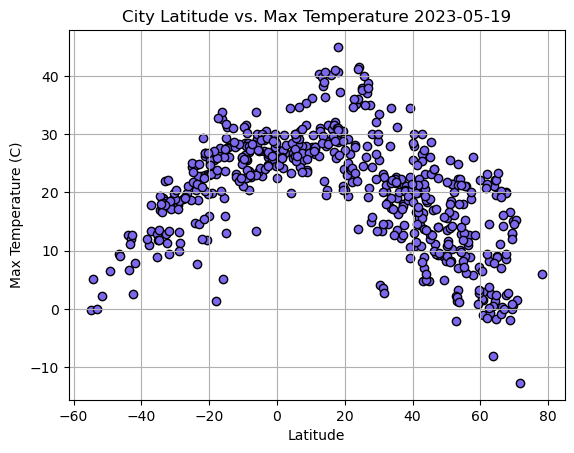

In [29]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

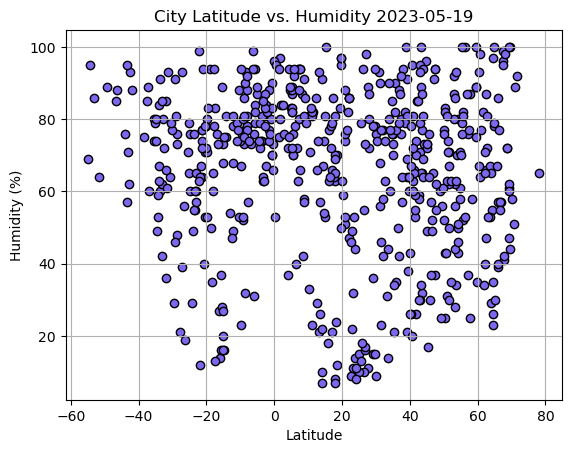

In [30]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

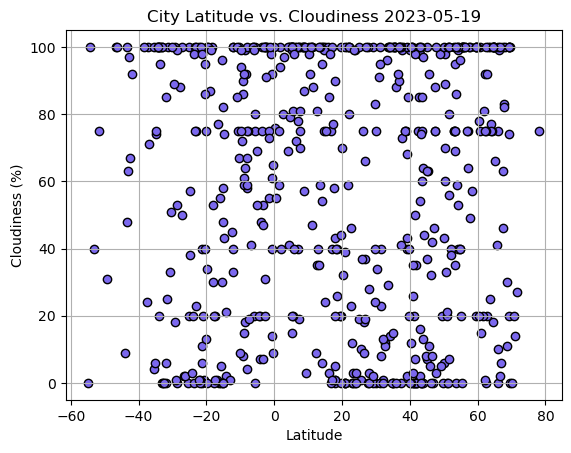

In [32]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

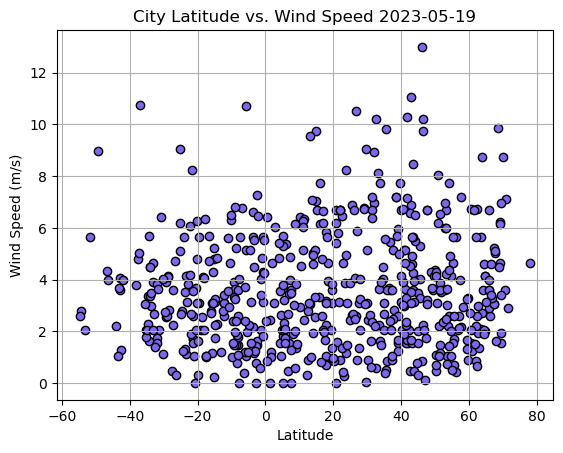

In [33]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
# Define Model:
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# Calculate and plot Pearson's r value
    print(f"The r-value is: {rvalue}")
    
# Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, rvalue

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,0.01,47,20,4.63,GL,1684763182
1,berber,18.0216,33.9830,40.69,8,0,5.84,SD,1684763182
3,veraval,20.9000,70.3667,29.16,74,0,5.42,IN,1684763182
6,cabo san lucas,22.8909,-109.9124,28.17,22,0,4.63,MX,1684763182
9,callaway,30.1530,-85.5699,25.53,76,75,0.89,US,1684763183


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()
lat_all_north = southern_hemi_df["Lat"]
temp_all_north = southern_hemi_df["Max Temp"]
humid_all_north = northern_hemi_df["Humidity"]
cloud_all_north = northern_hemi_df["Cloudiness"]
wind_all_north = northern_hemi_df["Wind Speed"]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,5.09,95,100,2.78,GS,1684763182
4,puerto natales,-51.7236,-72.4875,2.25,64,75,5.66,CL,1684763182
5,port-aux-francais,-49.3500,70.2167,6.57,89,31,8.99,TF,1684763182
7,bredasdorp,-34.5322,20.0403,16.99,49,100,3.37,ZA,1684763182
8,west island,-12.1568,96.8225,27.99,78,40,2.57,CC,1684763183


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.7154294143535794


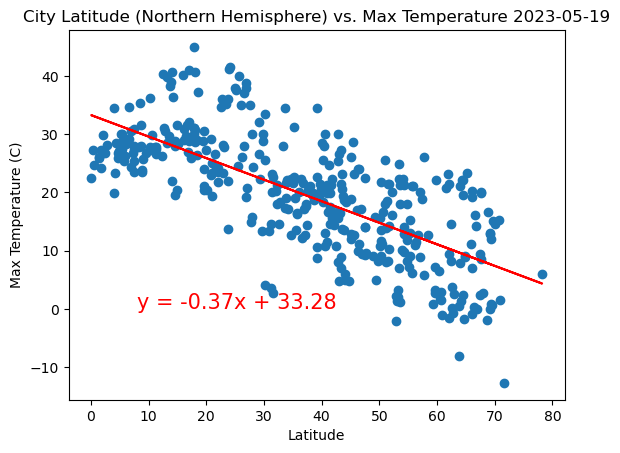

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regEQplotX = 8
regEQplotY = 0
# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (8, 0), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.7724192556924352


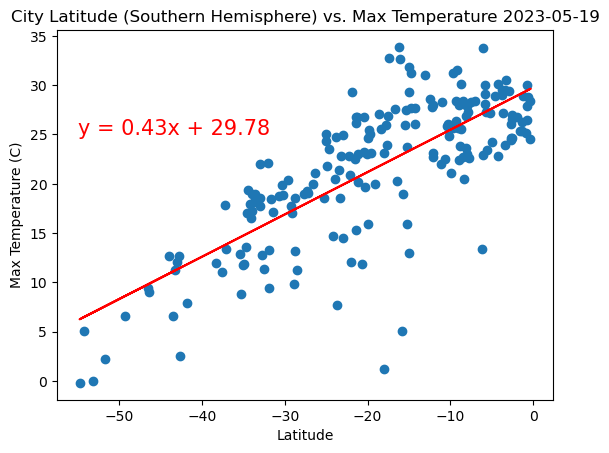

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regEQplotX = -55
regEQplotY = 25

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
Northeren Hemisphere : The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.035108791516453144


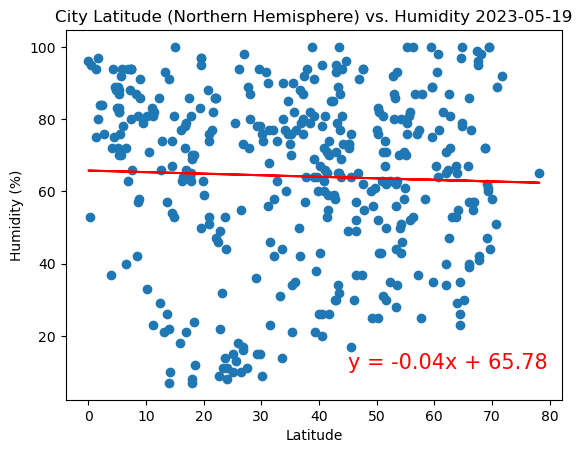

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 11

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (45, 11), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig7.png")

# Show the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.031355469875720195


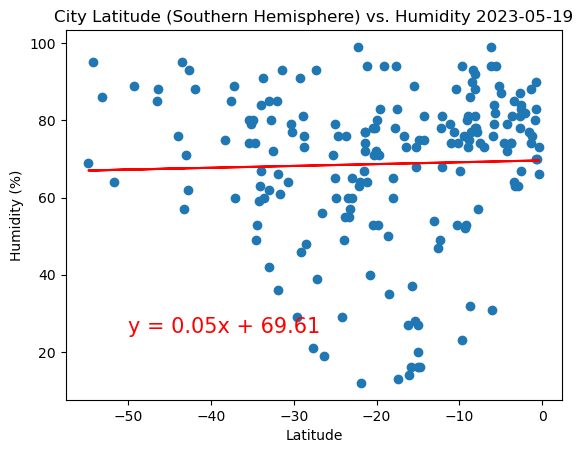

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = -50
regEQplotY = 25

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Southern Hemisphere : The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.04043407158414338


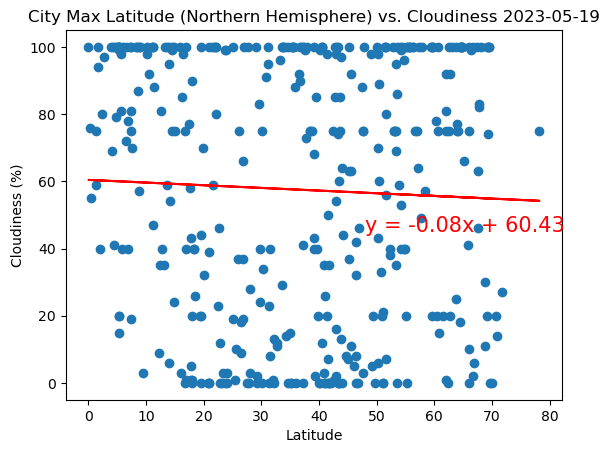

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 48
regEQplotY = 45

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (48, 45), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig9.png")

# Show the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.0032828704969408962


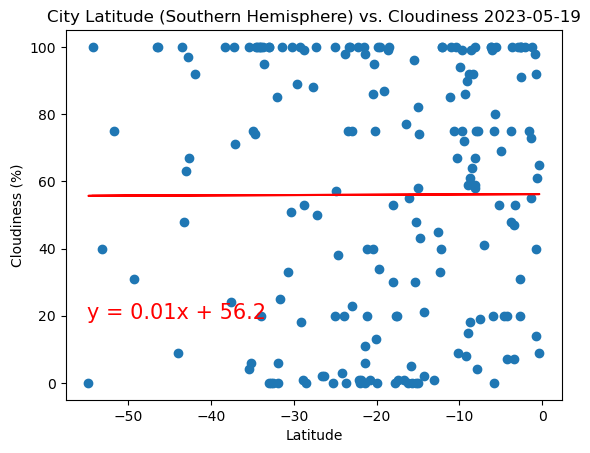

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = -55
regEQplotY = 19

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 19), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig10.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere : The regression does not display much of a correlation between the data sets.
Southern hemisphere : The regression does not display much of a correlation between the data sets.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: 0.0533567248514171


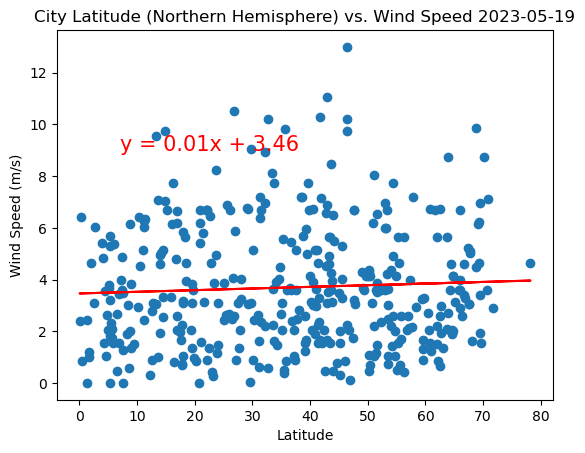

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 7
regEQplotY = 9

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (7, 9), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig11.png")

# Show the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-value is: -0.05983908975708726


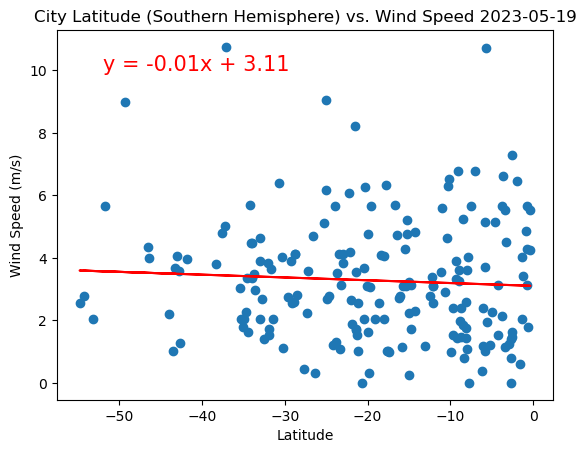

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-52, 10), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("../output_data/Fig12.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere :The regression does not display much of a correlation between the data sets.
Southern Hemisphere : The regression does not display much of a correlation between the data sets.